# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [99]:
#For our practical excercise we are supplied with the bank-additional-full.csv with 41188 samples and 20 inputs
#Also, there is a reduced dataset bank-additional.csv with 10% of the examples (4119), randomly selected, and 20 inputs
#For execises below we work with the full dataset.
#The link to the article accompanying the dataset (above) did not work ("file does not exist"), so I worked with the info provided
#at the UCI link

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')


In [101]:
#Load the full dataset and preview the data features and values
df_full = pd.read_csv('bank-additional-full.csv', sep = ';')

In [102]:
df_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [103]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [104]:
#Check dataset for duplicates and missing or NaN values below

In [105]:
#check for duplicates in dataset
print(df_full.duplicated().sum())

12


In [106]:
#delete duplicates
df_full = df_full.drop_duplicates()

In [107]:
#Check for NaN and missing data; False indicates no missing data
print(df_full.isna().any().any())

False


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [108]:
#Look at target value counts in the full dataset before cleaning
df_full['y'].value_counts()

,count
y,
no,36537
yes,4639


In [109]:
#Clean the raw dataset to get ready for encoding and feature engineering before split into train and test datasets

In [110]:
#CLEANING DATASET
#REMOVE 'unknown' values
#per point number 8 in UCI notes: "unknown values can be considered a class or can be deleted"
#after deletion we still retain over 30k samples (75% of the full dataset) so I prefer to remove them

df_full_cleaned = df_full[df_full['job'] != 'unknown']
df_full_cleaned = df_full_cleaned[df_full_cleaned['marital'] != 'unknown']
df_full_cleaned = df_full_cleaned[df_full_cleaned['education'] != 'unknown']
df_full_cleaned = df_full_cleaned[df_full_cleaned['default'] != 'unknown']
df_full_cleaned = df_full_cleaned[df_full_cleaned['housing'] != 'unknown']
df_full_cleaned = df_full_cleaned[df_full_cleaned['loan'] != 'unknown']
df_full_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30478 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30478 non-null  int64  
 1   job             30478 non-null  object 
 2   marital         30478 non-null  object 
 3   education       30478 non-null  object 
 4   default         30478 non-null  object 
 5   housing         30478 non-null  object 
 6   loan            30478 non-null  object 
 7   contact         30478 non-null  object 
 8   month           30478 non-null  object 
 9   day_of_week     30478 non-null  object 
 10  duration        30478 non-null  int64  
 11  campaign        30478 non-null  int64  
 12  pdays           30478 non-null  int64  
 13  previous        30478 non-null  int64  
 14  poutcome        30478 non-null  object 
 15  emp.var.rate    30478 non-null  float64
 16  cons.price.idx  30478 non-null  float64
 17  cons.conf.idx   30478 non-null  floa

In [111]:
#look at target variable values after cleaning
df_full_cleaned['y'].value_counts()

,count
y,
no,26620
yes,3858


In [112]:
#EXAMINE OTHER FEATURES that may need further cleaning
#'poutcome' (feature 15 in list above) needs to be looked at-- what does 'nonexistent' value mean?
#getting rid of records with nonexistent for 'poutcome' would significantly reduce the dataset

df_full_cleaned['poutcome'].value_counts()

,count
poutcome,
nonexistent,25826
failure,3461
success,1191


In [113]:
#value_counts for 'poutcome' is 'nonexistent' can have a target outcome that is 'yes' or'no'
#for now will leave it in the dataset and use One-hot encoding since there are only 3 possible values it won't significantly impact
#dimensionality

df_full_cleaned[df_full_cleaned['poutcome'] == 'nonexistent']['y'].value_counts()


,count
y,
no,23255
yes,2571


In [114]:
#also note that 'poutcome' 'sucess' does not mean the target outcome ('y') is yes
df_full_cleaned[df_full_cleaned['poutcome'] == 'success']['y'].value_counts()


,count
y,
yes,779
no,412


In [115]:
#same as above 'poutcome' failure does not mean the target outcome ('y') is no
df_full_cleaned[df_full_cleaned['poutcome'] == 'failure']['y'].value_counts()

,count
y,
no,2953
yes,508


In [116]:
#Another feature to examine further is 'duration' (feature 11 in the list at the top)
#the notes above indicate feature 11 'duration' should be dropped from data for predictive models...

#when duration is zero, y is always zero...but there are only 4 records where duration is zero
df_full_cleaned[df_full_cleaned['duration']==0]['y'].value_counts()

,count
y,
no,4


In [117]:
#As stated dataset description (above) 'duration' is of no use for use in a predictive model because you would have to know in
#advance how long the telemarketing call would last, which is not possible
#For this reason, I am dropping 'duration' from the features

df_full_cleaned = df_full_cleaned.drop(columns = 'duration')
df_full_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30478 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30478 non-null  int64  
 1   job             30478 non-null  object 
 2   marital         30478 non-null  object 
 3   education       30478 non-null  object 
 4   default         30478 non-null  object 
 5   housing         30478 non-null  object 
 6   loan            30478 non-null  object 
 7   contact         30478 non-null  object 
 8   month           30478 non-null  object 
 9   day_of_week     30478 non-null  object 
 10  campaign        30478 non-null  int64  
 11  pdays           30478 non-null  int64  
 12  previous        30478 non-null  int64  
 13  poutcome        30478 non-null  object 
 14  emp.var.rate    30478 non-null  float64
 15  cons.price.idx  30478 non-null  float64
 16  cons.conf.idx   30478 non-null  float64
 17  euribor3m       30478 non-null  floa

In [118]:
#Above completes the data cleaning, now proceed to encoding

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [119]:
#BUSINESS OBJECTIVE:
#The telemarketing campaign offered clients a long-term deposit banking product (aka "term deposit")
#The classification goal is to predict if the client will subscribe (yes/no) a term deposit, which is (variable 'y')
#The input variables relate to bank clients, products, and socio-economic attributes that were collected
#in conjunction with the campaign
#clients predicted to accept the offer would be the ones to target the future telemarketing effort towards

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [120]:
#ENCODING CLEANED DATASET

In [121]:
#create an independent copy of the cleaned dataset to begin encoding
df_full_encoded = df_full_cleaned.copy()

In [122]:
# From the variable descripton (above), identify features with 'yes' and 'no' values and convert to 1 and 0
binary_cols = ['default', 'housing', 'loan', 'y']

# Apply replacement and type conversion only to the list binary_cols
for col in binary_cols:
    df_full_encoded[col] = df_full_encoded[col].replace({'yes': 1, 'no': 0}).astype(int)

df_full_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30478 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30478 non-null  int64  
 1   job             30478 non-null  object 
 2   marital         30478 non-null  object 
 3   education       30478 non-null  object 
 4   default         30478 non-null  int64  
 5   housing         30478 non-null  int64  
 6   loan            30478 non-null  int64  
 7   contact         30478 non-null  object 
 8   month           30478 non-null  object 
 9   day_of_week     30478 non-null  object 
 10  campaign        30478 non-null  int64  
 11  pdays           30478 non-null  int64  
 12  previous        30478 non-null  int64  
 13  poutcome        30478 non-null  object 
 14  emp.var.rate    30478 non-null  float64
 15  cons.price.idx  30478 non-null  float64
 16  cons.conf.idx   30478 non-null  float64
 17  euribor3m       30478 non-null  floa

In [123]:
#One-hot encode the 'poutcome' feature above with values 'nonexistent', 'failure', 'success'
#as integer values
df_full_encoded = pd.get_dummies(df_full_encoded, columns=['poutcome'], dtype=int)
df_full_encoded.info()


<class 'pandas.core.frame.DataFrame'>
Index: 30478 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   30478 non-null  int64  
 1   job                   30478 non-null  object 
 2   marital               30478 non-null  object 
 3   education             30478 non-null  object 
 4   default               30478 non-null  int64  
 5   housing               30478 non-null  int64  
 6   loan                  30478 non-null  int64  
 7   contact               30478 non-null  object 
 8   month                 30478 non-null  object 
 9   day_of_week           30478 non-null  object 
 10  campaign              30478 non-null  int64  
 11  pdays                 30478 non-null  int64  
 12  previous              30478 non-null  int64  
 13  emp.var.rate          30478 non-null  float64
 14  cons.price.idx        30478 non-null  float64
 15  cons.conf.idx         30

In [124]:
#Additional features without an inherent order must also be handled by one-hot encoding
#One-hot encode 'job', 'marital', 'contact', 'day of week' to be integer values

df_full_encoded = pd.get_dummies(df_full_encoded, columns=['job', 'marital', 'contact', 'day_of_week'], dtype=int)
df_full_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30478 entries, 0 to 41187
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   30478 non-null  int64  
 1   education             30478 non-null  object 
 2   default               30478 non-null  int64  
 3   housing               30478 non-null  int64  
 4   loan                  30478 non-null  int64  
 5   month                 30478 non-null  object 
 6   campaign              30478 non-null  int64  
 7   pdays                 30478 non-null  int64  
 8   previous              30478 non-null  int64  
 9   emp.var.rate          30478 non-null  float64
 10  cons.price.idx        30478 non-null  float64
 11  cons.conf.idx         30478 non-null  float64
 12  euribor3m             30478 non-null  float64
 13  nr.employed           30478 non-null  float64
 14  y                     30478 non-null  int64  
 15  poutcome_failure      30

In [125]:
#Some addtional features need to ordinal numerically
#For 'education' ordinal encoding is the logical choice, which I will do directly from lowest ('illiterate')to highest amount of
#education ('university degree')
df_full_encoded['education']  = df_full_encoded['education'].replace({'basic.4y': 2, 'basic.6y': 3, 'basic.9y': 4, 'high.school': 5, 'illiterate': 1, 'professional.course': 6, 'university.degree': 7}).astype(int)

#For 'month' one-hot is generally most appropriate because their is no preferential rank of months in this case or cyclical aspect
df_full_encoded = pd.get_dummies(df_full_encoded, columns=['month'], dtype=int)
df_full_encoded.info()


<class 'pandas.core.frame.DataFrame'>
Index: 30478 entries, 0 to 41187
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   30478 non-null  int64  
 1   education             30478 non-null  int64  
 2   default               30478 non-null  int64  
 3   housing               30478 non-null  int64  
 4   loan                  30478 non-null  int64  
 5   campaign              30478 non-null  int64  
 6   pdays                 30478 non-null  int64  
 7   previous              30478 non-null  int64  
 8   emp.var.rate          30478 non-null  float64
 9   cons.price.idx        30478 non-null  float64
 10  cons.conf.idx         30478 non-null  float64
 11  euribor3m             30478 non-null  float64
 12  nr.employed           30478 non-null  float64
 13  y                     30478 non-null  int64  
 14  poutcome_failure      30478 non-null  int64  
 15  poutcome_nonexistent  30

In [126]:
#Now we have a fully numerical dataset (df_full_encoded) to begin modeling

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [127]:
#Proceed to split data into train and test datasets
#First assign input variables to X and set y as target variable
X = df_full_encoded.drop(columns = 'y')
y = df_full_encoded['y']

In [128]:
#split data into train and test sets; test set is 20% of data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=0.2)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [129]:
#Baseline prediction can be established to two simple ways
#if we predicted 'no' (majority class) always, we would be accurate 87.4% of the time
y_train.value_counts(normalize = True)


,proportion
y,
0,0.874046
1,0.125954


In [130]:
#Also we can use the dummy classifier to set a baseline of accuracy
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)
accuracy_score(y_test, y_pred)


0.8708989501312336

In [131]:
#As we can see the two baseline methods are pretty close

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [132]:
#running model without scaling resulted in a convergence warning
simple_model = LogisticRegression()
simple_model.fit(X_train, y_train)
y_pred = simple_model.predict(X_test)

In [133]:
#To fix this...scaling numeric features other than one-hot, ordinal, or binary encoded
#Apply StandardScaler only to the original numeric features'age', 'campaign', 'pdays', 'previous',
#'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'

columns_to_scale = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[columns_to_scale])
X_test_scaled = scaler.transform(X_test[columns_to_scale])

#scaled dataframes with the scaled columns and the original non-scaled columns
X_train_scaled = pd.DataFrame(X_train_scaled, columns=columns_to_scale, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=columns_to_scale, index=X_test.index)

# Combine scaled numeric features with original one-hot, ordinal, binary encoded features
X_train_combined = pd.concat([X_train_scaled, X_train.drop(columns=columns_to_scale)], axis=1)
X_test_combined = pd.concat([X_test_scaled, X_test.drop(columns=columns_to_scale)], axis=1)



In [134]:
#For variable naming simplicity
X_train_scaled = X_train_combined
X_test_scaled = X_test_combined

In [135]:
# Retrain the model with scaled data and also increase the max_iter
simple_model_scaled = LogisticRegression(max_iter=1000)
simple_model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = simple_model_scaled.predict(X_test_scaled)

### Problem 9: Score the Model

What is the accuracy of your model?

In [136]:
# Get the accuracy score the scaled logistic regression model above
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy of basic Logistic Regression model with scaled data: {accuracy_scaled}")

Accuracy of basic Logistic Regression model with scaled data: 0.8873031496062992


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [137]:
import time
#Calculate train time for Linear Regression (LR)
start_time = time.time()
simple_model_scaled = LogisticRegression(max_iter=1000)
simple_model_scaled.fit(X_train_scaled, y_train)
end_time = time.time()
lr_train_time = end_time - start_time

# create results_df and add LR
results_df = pd.DataFrame(columns=['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy'])
new_row = pd.DataFrame([{'Model': 'Logistic Regression', 'Train Time': lr_train_time,
    'Train Accuracy': simple_model_scaled.score(X_train_scaled, y_train),
    'Test Accuracy': simple_model_scaled.score(X_test_scaled, y_test)}])

results_df = pd.concat([results_df, new_row], ignore_index=True)
display(results_df)



,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,1.00742,0.889714,0.887303


In [138]:

# Calculate train time for KNN
start_time = time.time()
knn_model = KNeighborsClassifier().fit(X_train_scaled, y_train)
end_time = time.time()
knn_train_time = end_time - start_time

# Create results_df and add KNN results
#results_df = pd.DataFrame(columns=['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy'])
new_row = pd.DataFrame([{'Model': 'KNN', 'Train Time': knn_train_time, 'Train Accuracy': knn_model.score(X_train_scaled, y_train), 'Test Accuracy': knn_model.score(X_test_scaled, y_test)}])
results_df = pd.concat([results_df, new_row], ignore_index=True)

display(results_df)

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,1.007420,0.889714,0.887303
1,KNN,0.016623,0.902592,0.876804


In [139]:
#Calculate train time for Decision Tree
start_time = time.time()
dtree_model = DecisionTreeClassifier().fit(X_train_scaled, y_train)
end_time = time.time()
dtree_train_time = end_time - start_time

#Add Decision Tree results to results_df
new_row = pd.DataFrame([{'Model': 'Decision Tree', 'Train Time': dtree_train_time, 'Train Accuracy': dtree_model.score(X_train_scaled, y_train), 'Test Accuracy': dtree_model.score(X_test_scaled, y_test)}])
results_df = pd.concat([results_df, new_row], ignore_index=True)

display(results_df)

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,1.007420,0.889714,0.887303
1,KNN,0.016623,0.902592,0.876804
2,Decision Tree,0.206744,0.994340,0.827264


In [140]:
#Calculate train time for SVM
start_time = time.time()
svm_model = SVC().fit(X_train_scaled, y_train)
end_time = time.time()
svm_train_time = end_time - start_time

#Add SVM results to results_df
new_row = pd.DataFrame([{'Model': 'SVM', 'Train Time': svm_train_time, 'Train Accuracy': svm_model.score(X_train_scaled, y_train), 'Test Accuracy': svm_model.score(X_test_scaled, y_test)}])
results_df = pd.concat([results_df, new_row], ignore_index=True)

display(results_df)

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,1.007420,0.889714,0.887303
1,KNN,0.016623,0.902592,0.876804
2,Decision Tree,0.206744,0.994340,0.827264
3,SVM,42.239259,0.887868,0.886319


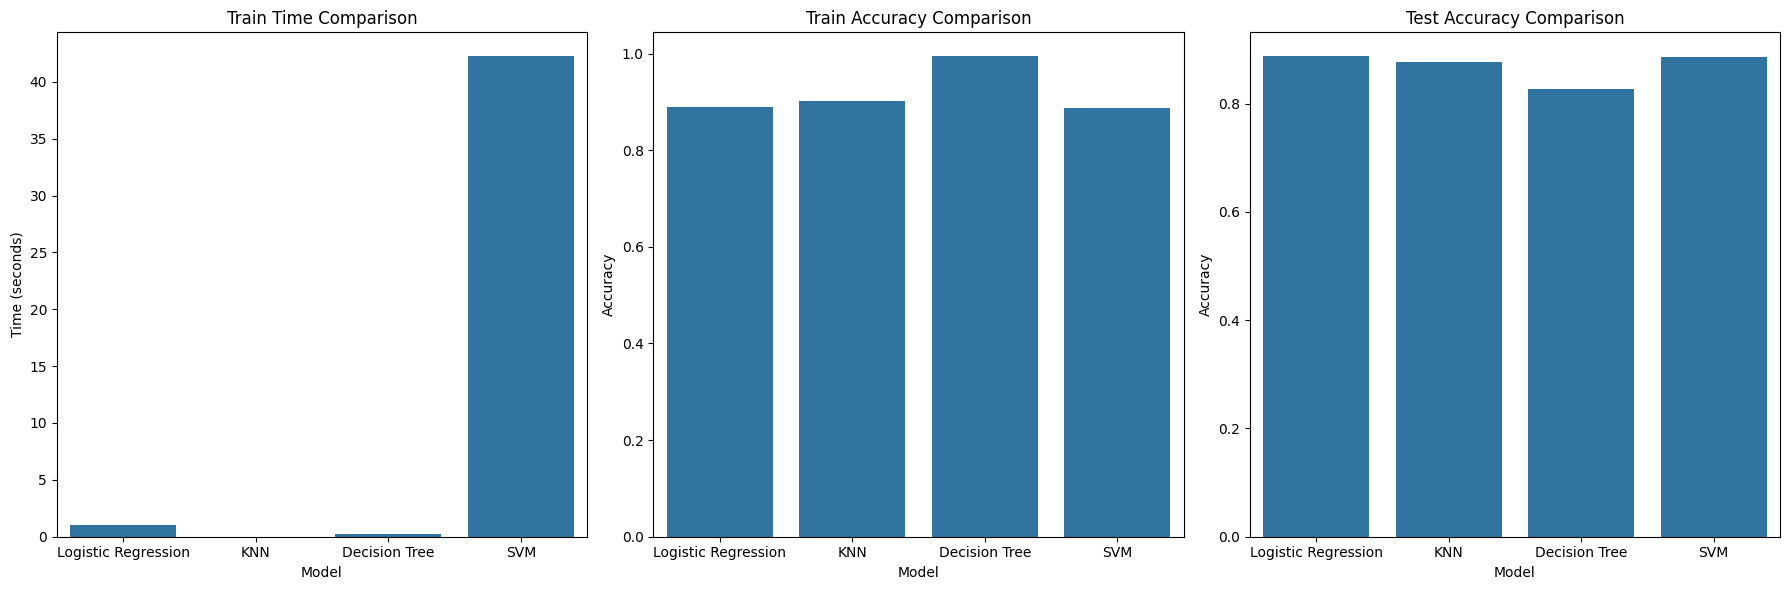

In [141]:
#plot the results of the comparison test (results_df)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.barplot(x=results_df['Model'], y='Train Time', data=results_df, ax=axes[0])
axes[0].set_title('Train Time Comparison')
axes[0].set_ylabel('Time (seconds)')

sns.barplot(x=results_df['Model'], y='Train Accuracy', data=results_df, ax=axes[1])
axes[1].set_title('Train Accuracy Comparison')
axes[1].set_ylabel('Accuracy')

sns.barplot(x=results_df['Model'], y='Test Accuracy', data=results_df, ax=axes[2])
axes[2].set_title('Test Accuracy Comparison')
axes[2].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [142]:
#COMMENTS ON ABOVE RESULTS:
#KNN trains the fastest, but it's test accuracy is below the baseline
#SVM and Logistic Regression have the best accuracy, but SVM takes much longer to train
#So, I would use the Logistic Regression model as my top choice

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.


- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [143]:
#GRIDSEARCHCV TO FURTHER TUNE MODELS
#use GridSearchCV to tune hyperparameters on LR, KNN, Decision Tree, and SVM models
#NOTE: I tried running one big GridSearchCV with all the models and all the hyperparameters but it took way too long,
#so better to break it up per model

In [144]:
#start with Logisitc Regression and tune hyperparamenters C and try both L1, L2 regularization
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
print(f"Best parameters for Logistic Regression: {best_params}")
best_score = grid_search.best_score_
print(f"Best score for Logistic Regression: {best_score}")

Best parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2'}
Best score for Logistic Regression: 0.8888523637175922


In [145]:
#next try KNN and tune hyperparameters k (n_neighbors) and wieghts, odd values of k since it majority vote
param_grid = {'n_neighbors': [3,5,7,9], 'weights': ['uniform', 'distance']}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
print(f"Best parameters for KNN: {best_params}")
best_score = grid_search.best_score_
print(f"Best score for KNN: {best_score}")

Best parameters for KNN: {'n_neighbors': 9, 'weights': 'uniform'}
Best score for KNN: 0.8815107762524972


In [146]:
#next try Decision Tree and tune hyperparameters max_depth and criterion
param_grid = {'max_depth': [None, 2, 4, 6, 8, 10], 'criterion': ['gini', 'entropy']}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f"Best parameters for Decision Tree: {best_params}")
best_score = grid_search.best_score_
print(f"Best score for Decision Tree: {best_score}")

Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 6}
Best score for Decision Tree: 0.8880320023522039


In [147]:
#For this part of the practical excercise, I am comparing Logistic Regression, KNN, and Decision Tree models.
#Running GridSearchCV on the SVC classifier to test hyperparameters C and kernel
#(rbf and linear) took too long to be of practical use with this dataset
#for SVM I would use the reduced sampled dataset with only 4K samples instead to see how it performed

In [148]:
#COMPARE MODELS WITH TUNED HYPERPARAMETERS

models = {'KNN': KNeighborsClassifier(),
          'Decision Tree': DecisionTreeClassifier(),
          'Logistic Regression': LogisticRegression()}
params = {'KNN': {'n_neighbors': [9]},
          'Decision Tree': {'max_depth': [6],'criterion': ['gini']},
          'Logistic Regression': {'C': [0.01]}}

results = {}

for model_name, model in models.items():
    print(f"Tuning {model_name}...")
    start_time = time.time()

    # Get the parameters for each model that were the best parameters from above
    model_params = params[model_name]

    grid = GridSearchCV(estimator=model, param_grid=model_params, scoring='accuracy', cv=5, verbose=1)
    grid.fit(X_train_scaled, y_train)

    end_time = time.time()
    fit_time = end_time - start_time

    best_score = grid.best_score_
    test_accuracy = grid.score(X_test_scaled, y_test)

    results[model_name] = {
        'Train Time': fit_time,
        'Train Accuracy': best_score,
        'Test Accuracy': test_accuracy,
        'Best Params': grid.best_params_
    }

# Print the results in a DataFrame
results_df = pd.DataFrame(results).T
print("\nModel Comparison Results:")
display(results_df)

Tuning KNN...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tuning Decision Tree...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tuning Logistic Regression...
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Model Comparison Results:


,Train Time,Train Accuracy,Test Accuracy,Best Params
KNN,5.236553,0.881511,0.883694,{'n_neighbors': 9}
Decision Tree,0.397382,0.886884,0.890584,"{'criterion': 'gini', 'max_depth': 6}"
Logistic Regression,2.956878,0.888811,0.888615,{'C': 0.01}


In [148]:
#OVERALL RESULTS:
#Decision Tree with the hyperparameters tuned per the chart above showed the best combination of training
#time and accuracy for training cross-validation set and test set.
#Running the models with default in Problem 10 yielded higher training accuracy scores than the optimized models
#in Problem 11 in some cases, but the test accuracy was lower, so there was some improvement.  Indicating the
#default models were overfitting.
#The Decision Tree model would correctly predict the outcome (yes or no) 89% of the time.
#If I had more time perhaps to further clean data or try different sub-sets of the data I might have gotten a
#different result.


##### Questions